### Imports

In [37]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from MLProject2Dataset import MLProject2Dataset, MLProject2DatasetSmall
from CNNModels import SimpleCNN
from helper_functions import image_transforms, plot_training_progress, train_net, test_net

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import numpy as np

# 4. ΑΠΛΟ ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [38]:
dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms(50, 62))
# dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms(50, 62))

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [39]:
classes = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AKIEC',
    4: 'BKL',
    5: 'DF',
    6: 'VASC'
}

In [40]:
len(dataset)

10015

In [41]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [42]:
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [43]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda


[Epoch: 0, batch:     0] Train loss: 0.195, Train acc: 0.016 | Validation loss: 1.754, Validation acc: 0.667
[Epoch: 0, batch:    10] Train loss: 1.352, Train acc: 0.659 | Validation loss: 1.152, Validation acc: 0.667
[Epoch: 0, batch:    20] Train loss: 1.155, Train acc: 0.652 | Validation loss: 1.021, Validation acc: 0.667
[Epoch: 0, batch:    30] Train loss: 1.074, Train acc: 0.664 | Validation loss: 1.009, Validation acc: 0.668
[Epoch: 0, batch:    40] Train loss: 1.001, Train acc: 0.681 | Validation loss: 0.963, Validation acc: 0.667
[Epoch: 0, batch:    50] Train loss: 1.066, Train acc: 0.656 | Validation loss: 1.155, Validation acc: 0.654
[Epoch: 0, batch:    60] Train loss: 1.034, Train acc: 0.686 | Validation loss: 0.961, Validation acc: 0.668
[Epoch: 0, batch:    70] Train loss: 1.013, Train acc: 0.666 | Validation loss: 0.950, Validation acc: 0.668
[Epoch: 0, batch:    80] Train loss: 0.959, Train acc: 0.681 | Validation loss: 0.929, Validation acc: 0.668
[Epoch: 0, batch:  

## 4.3 Γράφημα απώλειας και ευστοχίας

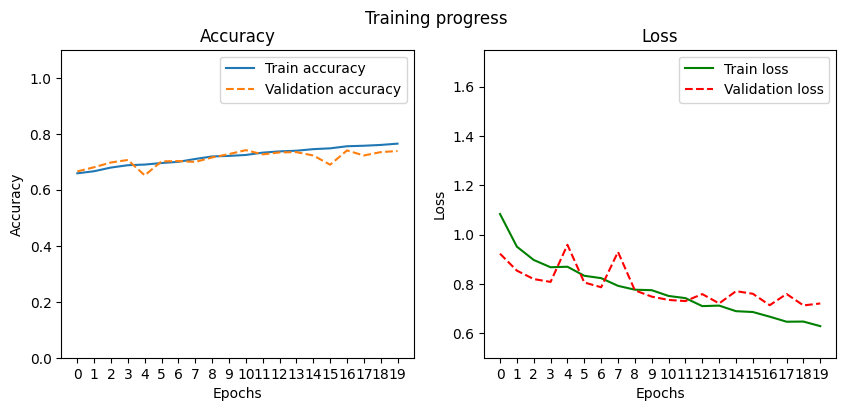

In [47]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [48]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0107. Test accuracy in 3004 images: 0.7483


## 4.5 Υπολογισμός πίνακα σύγχησης

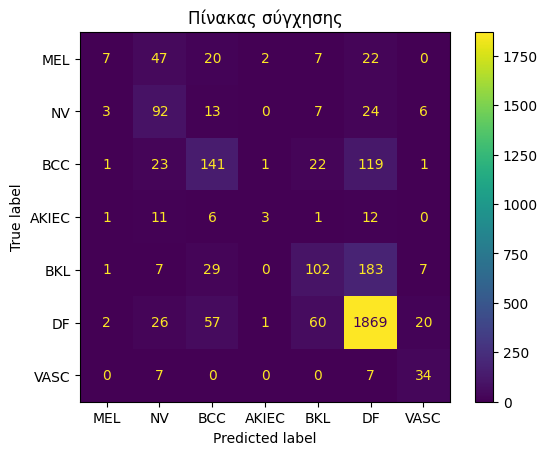

In [49]:
preds = np.array([x.tolist() for x in y_preds])
y_train = [x[1] for x in test]

conf_matrix = confusion_matrix(y_train, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes.values())
disp.plot()
plt.title('Πίνακας σύγχησης')
plt.show()

# 5. Σύνθετο ΣΝΔ